In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/датасеты/churn-bigml-20.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# Предобработка

In [6]:
df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [8]:
df['Churn'] = df['Churn'].astype(int)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    int64  
 4   Voice mail plan         667 non-null    int64  
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
duplicates = df.duplicated()
print(len(df[duplicates]))

0


# Исследование

In [12]:
df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,0.079460,0.283358,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718,0.142429
std,40.819480,41.783305,0.270659,0.450967,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357,0.349752
min,1.000000,408.000000,0.000000,0.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,0.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,102.000000,415.000000,0.000000,0.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000,0.000000
75%,128.000000,415.000000,0.000000,1.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000,0.000000
max,232.000000,510.000000,1.000000,1.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000,1.000000


In [13]:
df.groupby('Churn').mean()

<ipython-input-13-b46e00fedf9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Churn').mean()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,
0,102.636364,435.695804,0.059441,0.304196,8.991259,175.460140,100.776224,29.828829,199.799650,100.047203,16.983024,198.815385,100.258741,8.946731,10.242657,4.512238,2.766084,1.437063
1,104.073684,438.936842,0.200000,0.157895,4.894737,213.991579,101.905263,36.379053,224.764211,103.063158,19.105053,204.923158,99.242105,9.221789,10.212632,4.621053,2.758105,2.326316


Видим что на отток в некоторой степни влияют следущие колонки:
* International plan
* Voice mail plan
* Number vmail messages 
* Total day minutes	
* Total day charge
* Customer service calls	

In [14]:
df.groupby(['Churn'])['State'].count()

Churn
0    572
1     95
Name: State, dtype: int64

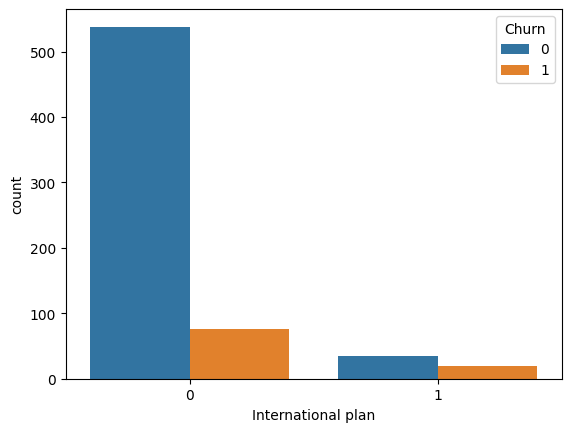

In [15]:
sns.countplot(data=df, x=df['International plan'], hue='Churn');

При наличии международного плана процент ушедших клиентов больше чем при его отсутвии

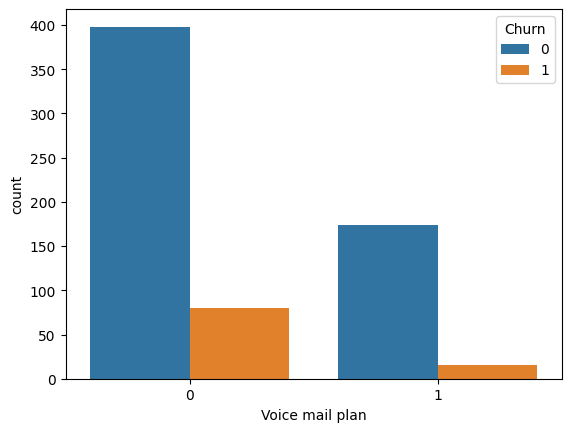

In [16]:
sns.countplot(data=df, x=df['Voice mail plan'], hue='Churn');

При отсутвии плана голосовой почты вероятность оттока больше

<Axes: xlabel='Total day minutes', ylabel='Churn'>

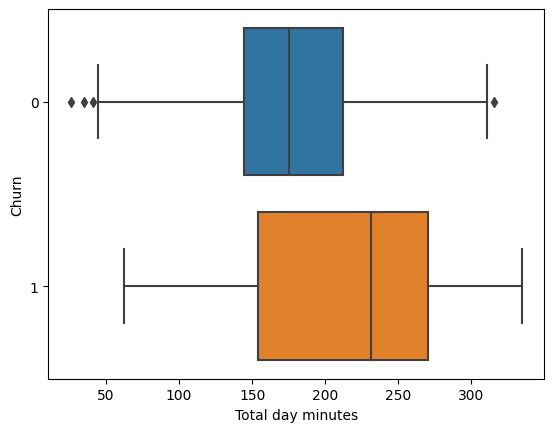

In [17]:
sns.boxplot(data=df, x=df['Total day minutes'], y=df['Churn'].astype('str'))

<Axes: xlabel='Total day charge', ylabel='Churn'>

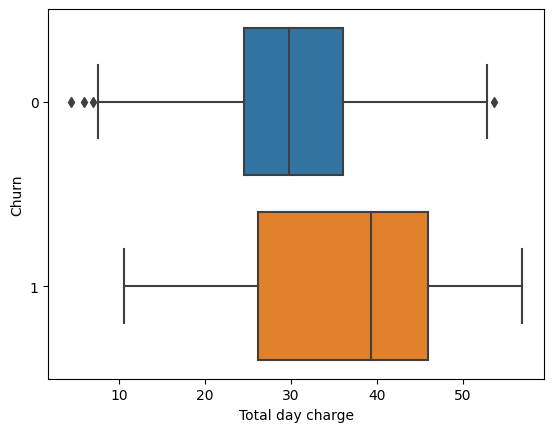

In [18]:
sns.boxplot(data=df, x=df['Total day charge'], y=df['Churn'].astype('str'))

Отток характерен для более высоких значений total day charge и total day minutes

<ipython-input-19-30a345005403>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

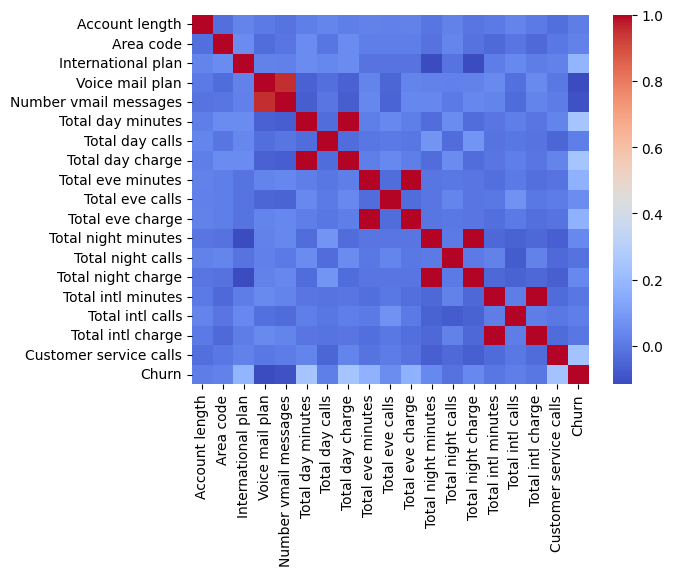

In [19]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

# Обучение модели случайного леса

In [20]:
df['State'].unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [21]:
df.drop(columns=['State'], inplace=True)

In [22]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(3, 11)}
gs = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
gs.fit(X_train, y_train)
# вывод наилучших параметров и оценки точности
print('Best parameters:', gs.best_params_)
print('Accuracy:', gs.best_score_)
rf = gs.best_estimator_

Best parameters: {'max_depth': 8, 'n_estimators': 40}
Accuracy: 0.9075955159002517


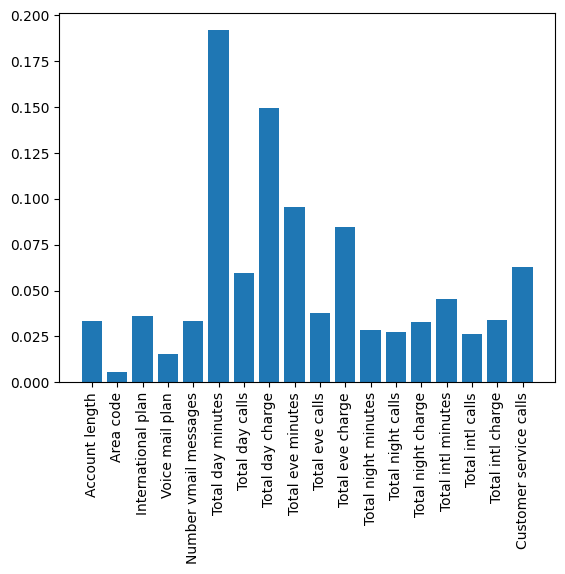

In [23]:
# Get the feature importances
importances = rf.feature_importances_
feature_names = df.drop(columns=['Churn']).columns

# построение диаграммы важности признаков
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.show()


In [24]:
prediction = rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9154228855721394

# Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction)
print(conf_mat)

# Добавляем названия столбцов и строк
print("          Predicted")
print("          0       1")
print("Actual 0  ", conf_mat[0])
print("       1  ", conf_mat[1])

[[172   1]
 [ 16  12]]
          Predicted
          0       1
Actual 0   [172   1]
       1   [16 12]


# Вывод

* Отток в большей степени зависит от таких данных как дневная плата, количество 
использованных минут, при высоких значенниях более вероятен уход клиентов.
* Также есть зависмость между целевым признаком и наличием голосовой почты и международного плана.
* В результате проделанной работы построена модель случайного леса, позволяющая достичь точности на тетсовых данных 91,5%